# CNN
Convolutional neural network.

See Geron chapter 14 page 461.

In [3]:
# See chapter 10 for introduction to the fashion data
import numpy as np
import tensorflow as tf
from tensorflow import keras

fashion = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion.load_data()
X_valid = X_train_full[:5000]/255.0 ## 5K instances
X_train = X_train_full[5000:]/255.0 ## 55K instances
y_valid = y_train_full[:5000]/255.0
y_train = y_train_full[5000:]/255.0

## Generic multi-layer perceptron (MLP)
Use the Keras Sequential API.

In [6]:
mlp = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense( 10,activation="softmax")
])
mlp.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
mlp.layers

In [9]:
# Keras layers have attributes: weights, shape, bias.
mlp.layers[1].weights

[<tf.Variable 'dense_6/kernel:0' shape=(784, 300) dtype=float32, numpy=
 array([[ 0.02893422,  0.06007202,  0.0109793 , ..., -0.00645142,
          0.01022372,  0.0029293 ],
        [ 0.07377671, -0.05821963,  0.03632037, ...,  0.07412404,
          0.02476529, -0.01196053],
        [-0.00640582, -0.05931767, -0.00595485, ...,  0.03995776,
         -0.01063411,  0.01987848],
        ...,
        [-0.02474273,  0.00026554,  0.0327147 , ...,  0.05155949,
          0.05838159, -0.0491417 ],
        [-0.04687519,  0.06524433, -0.00105372, ...,  0.06419644,
          0.01602952,  0.01006497],
        [-0.07150955,  0.02193726, -0.0378857 , ..., -0.00890799,
         -0.00675721,  0.06605132]], dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(300,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [18]:
# See page 302 for explanation of these parameters.
# See also the keras docs e.g. 
# https://www.tensorflow.org/api_docs/python/tf/keras/losses/sparse_categorical_crossentropy
# Note keras can take parameters for % train vs % validation.

mlp.compile(loss="sparse_categorical_crossentropy",
           optimizer="sgd",
           metrics=["accuracy"])
# 30 epochs runs for about 15 minutes and never impoves on 1st epoch.
# Therefore we changed epochs to 10.
history = mlp.fit(X_train,y_train,epochs=10,
                 validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 2.6061e-05 - accuracy: 0.1008 - val_loss: 2.4881e-05 - val_accuracy: 0.0914
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 2.5178e-05 - accuracy: 0.1008 - val_loss: 2.4049e-05 - val_accuracy: 0.0914
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 2.4352e-05 - accuracy: 0.1008 - val_loss: 2.3269e-05 - val_accuracy: 0.0914
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 2.3578e-05 - accuracy: 0.1008 - val_loss: 2.2536e-05 - val_accuracy: 0.0914
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 2.2850e-05 - accuracy: 0.1008 - val_loss: 2.1846e-05 - val_accuracy: 0.0914
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 2.2165e-05 - accuracy: 0.1008 - val_loss: 2.1196e-05 - val_accuracy: 0.0914
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 2.1519e-05 -

### Terrible!

Our results are terrible.
We have 10% accuracy and it never changes through the epochs.
In contrast, the book got 80% accuracy initially and it improved slightly.
The only difference that I see is memory size.
Our memory allowed 1719 instances per epoch
but the book shows 55,000.
Training loss at zero indicates the model is overfitting.
Validation loss is also zero -- which is confusing -- but notice
the validation accuracy is lower than the training accuracy.

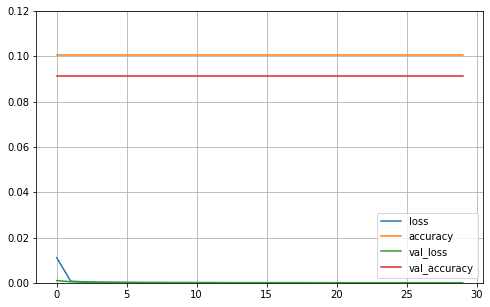

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,0.12)
plt.show()

In [19]:
# This shows that trainging did SOMETHING. 
mlp.layers[1].weights

[<tf.Variable 'dense_6/kernel:0' shape=(784, 300) dtype=float32, numpy=
 array([[ 0.02893424,  0.06007202,  0.01097935, ..., -0.00645139,
          0.01022384,  0.0029294 ],
        [ 0.07377677, -0.05821961,  0.03632076, ...,  0.07412427,
          0.02476603, -0.01195994],
        [-0.0064054 , -0.05931755, -0.00595398, ...,  0.03995836,
         -0.01063243,  0.01987981],
        ...,
        [-0.02470163,  0.00027336,  0.03277872, ...,  0.05163693,
          0.05855944, -0.04907988],
        [-0.04684269,  0.06525981, -0.00100584, ...,  0.06426812,
          0.01617687,  0.01008941],
        [-0.07150809,  0.02193827, -0.03788066, ..., -0.00890174,
         -0.00674473,  0.06605661]], dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(300,) dtype=float32, numpy=
 array([ 5.91536658e-03,  5.40899020e-03,  1.43172564e-02, -2.80447048e-03,
         2.34138593e-02,  2.40327558e-03,  2.62888870e-03, -3.03089758e-03,
        -1.13821086e-02,  1.22554402e-03,  4.80032153e-03, -6.24990